In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import pandas as pd
import re
import random
import json
import functools

# visualization libs
%matplotlib inline

#import pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
df = pd.read_excel('pokemon.xlsx')

In [3]:
df[:50]

,#,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,001,Bulbasaur,GRASS,318,45,49,49,65,65,45
1,001,Bulbasaur,POISON,318,45,49,49,65,65,45
2,002,Ivysaur,GRASS,405,60,62,63,80,80,60
3,002,Ivysaur,POISON,405,60,62,63,80,80,60
4,003,Venusaur,GRASS,525,80,82,83,100,100,80
5,003,Venusaur,POISON,525,80,82,83,100,100,80
6,003.1,Mega Venusaur,GRASS,625,80,100,123,122,120,80
7,003.1,Mega Venusaur,POISON,625,80,100,123,122,120,80
8,004,Charmander,FIRE,309,39,52,43,60,50,65
9,005,Charmeleon,FIRE,405,58,64,58,80,65,80


In [4]:
df1=df.copy()
cols = df1.columns[3:]
df1[cols] = df1[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

[Text(0.5, 1.0, 'Top 25 combinations of attack type and their combination')]

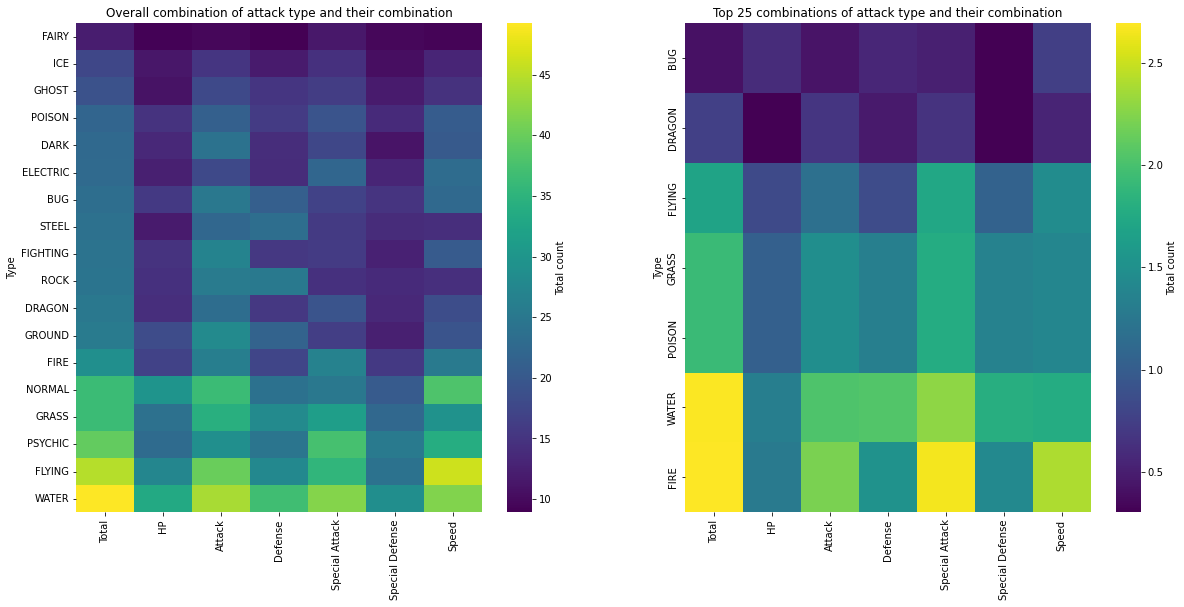

In [5]:
df_type = pd.DataFrame(df1[:].groupby(['Type'])[['Total','HP','Attack','Defense','Special Attack','Special Defense','Speed']].sum()).sort_values('Total')
df_type_25 = pd.DataFrame(df1[:25].groupby(['Type'])[['Total','HP','Attack','Defense','Special Attack','Special Defense','Speed']].sum()).sort_values('Total')

fig, ax = plt.subplots(1,2,figsize=(20,9))
p1 = sns.heatmap(df_type,cmap='viridis',cbar_kws={'label': 'Total count'},ax=ax[0])
p2 = sns.heatmap(df_type_25,cmap='viridis',cbar_kws={'label': 'Total count'},ax=ax[1])

p1.set(title = 'Overall combination of attack type and their combination')
p2.set(title = 'Top 25 combinations of attack type and their combination')

In [6]:
df1.isna().sum()

#                  0
Name               0
Type               0
Total              0
HP                 0
Attack             0
Defense            0
Special Attack     0
Special Defense    0
Speed              0
dtype: int64

In [7]:
# Pokemons with multiple type
df.duplicated('Name')

0       False
1        True
2       False
3        True
4       False
        ...  
1163    False
1164    False
1165     True
1166    False
1167     True
Length: 1168, dtype: bool

In [8]:
df0 = df1.sort_values('Total',ascending=False)

In [9]:
sub_cat_q = pd.DataFrame(df.groupby(['Name','Type'])[['Total']].sum().sort_values('Total',ascending=False))

[Text(0.5, 1.0, 'Most common type of pokemon')]

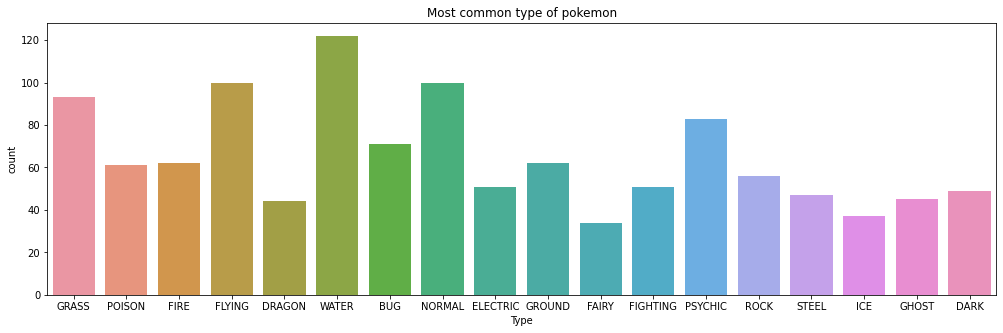

In [10]:
# Which type is common
# likelihood of battling a particular type of pokemon and having couunter type to it.
# This helps to find a pokemon against which water type pokemon is weak(grass or electric).
fig,ax = plt.subplots(figsize=(17,5))
p1 = sns.countplot(data = df, x=df.Type)
p1.set(title='Most common type of pokemon')

In [27]:
# Create column with winning chance considering Total as 800 with 100% winning chance
df1['winning_perc']=df1['HP']+df1['Attack']+df1['Defense']+df1['Special Attack']+df1['Special Defense']+df1['Speed']
df['winning_perc']=df['Total']/800
#df1['winning_perc']=df1['winning_perc']/df1['winning_perc'].max()

In [28]:
df1.head()

,#,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,winning_perc
0,001,Bulbasaur,GRASS,0.230,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,1.348392
1,001,Bulbasaur,POISON,0.230,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,1.348392
2,002,Ivysaur,GRASS,0.375,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,1.778604
3,002,Ivysaur,POISON,0.375,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,1.778604
4,003,Venusaur,GRASS,0.575,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,2.372561


In [29]:
from tqdm.auto import tqdm
tqdm.pandas(desc="my bar!")

In [30]:
df.groupby('Type').agg({"winning_perc":"mean"}).sort_values(by="winning_perc").style.bar(subset=['winning_perc'], align='zero', color=['#BA4B2F', '#7AAFe0'])

,winning_perc
Type,
BUG,0.471496
POISON,0.493689
FAIRY,0.494559
NORMAL,0.497963
GRASS,0.518669
WATER,0.527777
GROUND,0.534335
GHOST,0.543639
ROCK,0.552009


In [42]:
# #sns.distplot(results3["Win Percentage"].dropna(), bins=20)
# col = ['Type','HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed', 'Total','winning_perc']
# #results3.loc[:,'HP':'Speed'].corr()
# sns.pairplot(df1.loc[:,col].dropna())

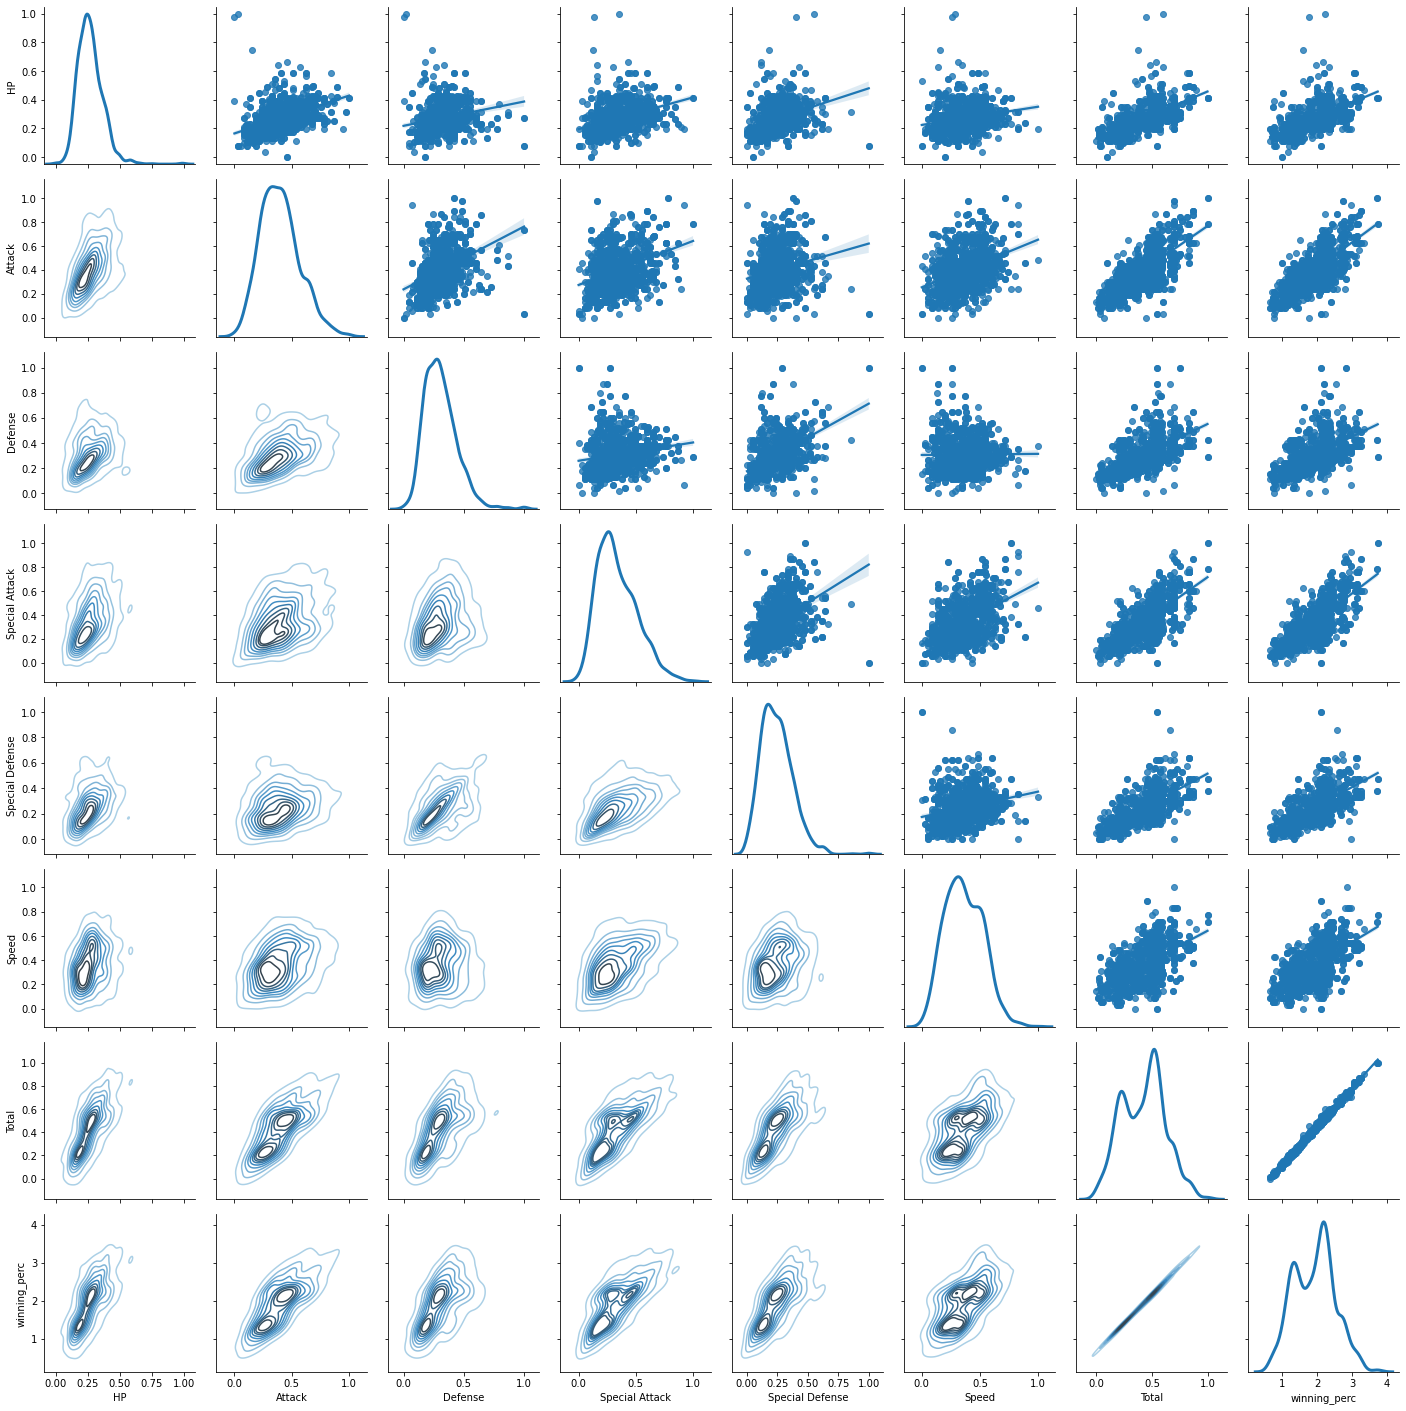

In [32]:
import matplotlib.pyplot as plt

g = sns.PairGrid(df1.loc[:,col], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

In [33]:
df.loc[:,col].corr()

,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total,winning_perc
HP,1.000000,0.462000,0.236490,0.390066,0.368303,0.209893,0.645554,0.645554
Attack,0.462000,1.000000,0.418756,0.370539,0.222006,0.375681,0.725774,0.725774
Defense,0.236490,0.418756,1.000000,0.183935,0.510069,0.010322,0.600540,0.600540
Special Attack,0.390066,0.370539,0.183935,1.000000,0.480222,0.485254,0.735748,0.735748
Special Defense,0.368303,0.222006,0.510069,0.480222,1.000000,0.248088,0.699038,0.699038
Speed,0.209893,0.375681,0.010322,0.485254,0.248088,1.000000,0.583207,0.583207
Total,0.645554,0.725774,0.600540,0.735748,0.699038,0.583207,1.000000,1.000000
winning_perc,0.645554,0.725774,0.600540,0.735748,0.699038,0.583207,1.000000,1.000000


In [34]:
# https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
#This function was taken from the link above 
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels = ['Type','HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed', 'Total','winning_perc']
    ax1.set_xticklabels(labels,fontsize=7)
    ax1.set_yticklabels(labels,fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.00,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.8,.85,.90,.95,1])
    plt.show()


C:\Users\jigar\AppData\Local\Temp\ipykernel_17744\177310680.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=7)
C:\Users\jigar\AppData\Local\Temp\ipykernel_17744\177310680.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=7)


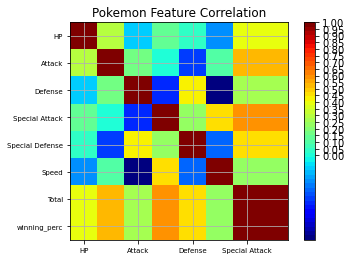

In [35]:
correlation_matrix(df.loc[:,col].corr())

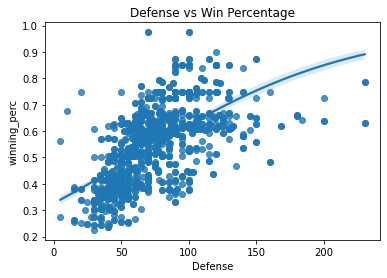

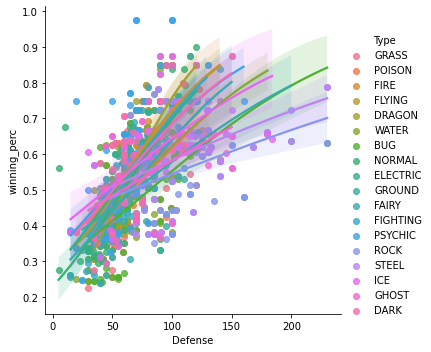

In [37]:
import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(x="Defense", y="winning_perc", data=df, logistic=True).set_title("Defense vs Win Percentage")
sns.lmplot(x="Defense", y="winning_perc", data=df, hue = 'Type',  logistic=True)#.set_title("Speed vs Win Percentage")

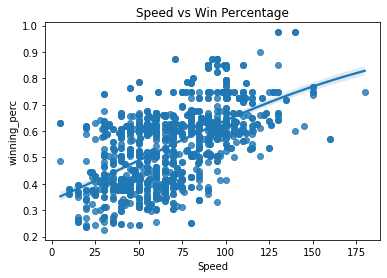

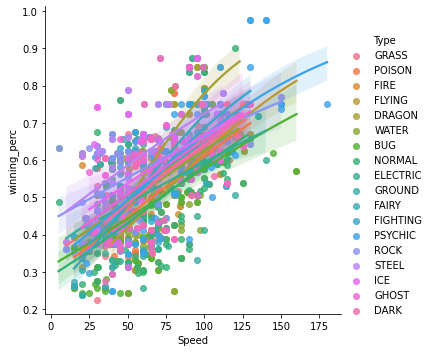

In [39]:
import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(x="Speed", y="winning_perc", data=df, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="winning_perc", data=df, hue = 'Type',  logistic=True)#.set_title("Speed vs Win Percentage")

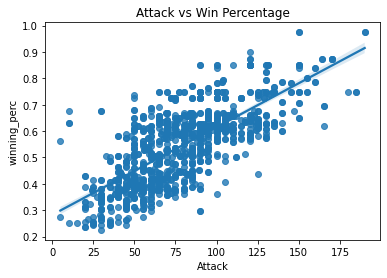

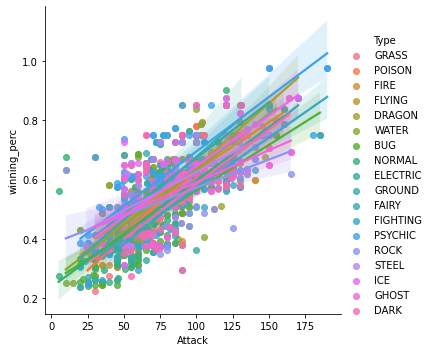

In [41]:
ax = sns.regplot(x="Attack", y="winning_perc", data=df).set_title("Attack vs Win Percentage")
sns.lmplot(x="Attack", y="winning_perc", data=df, hue = 'Type',fit_reg =True)

To conclude,
1. Dragon, steel, psychic, fighting and ice pokemons have higher winning chance.
2. water flying, dragon, normal and pyschic type of pokemon are most common pokemons.
3. Defence dosent win the fight. We need powerful attackers with high speed